<b style="color:pink">Import Libraries</b>


In [2]:
import numpy as np 
import pandas as pd
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import missingno as msno
import country_converter as coco
 

In [5]:
df=pd.read_csv('ds_salaries.csv',index_col='Unnamed: 0')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [6]:
df.drop(df[['salary','salary_currency']],axis=1, inplace=True)
df.shape

(607, 9)

<AxesSubplot:>

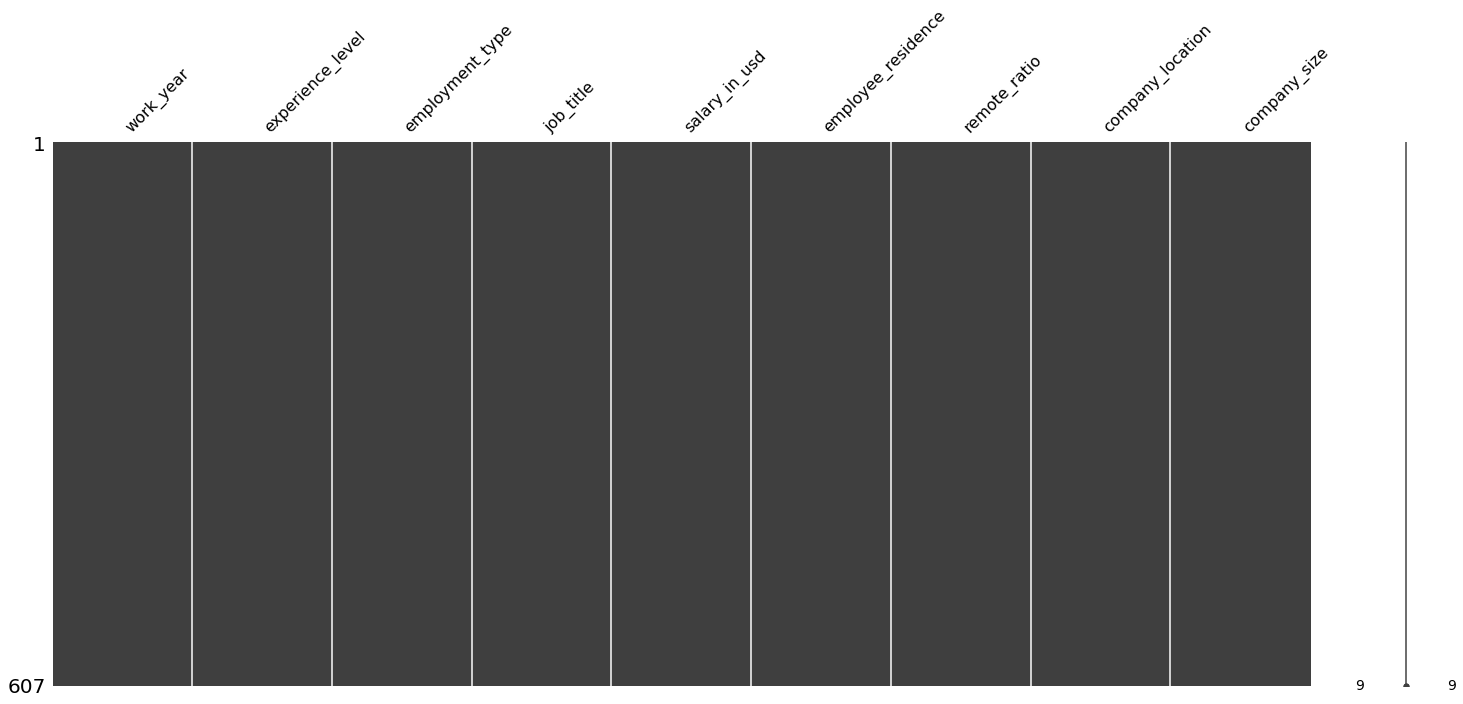

In [7]:
msno.matrix(df)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 47.4+ KB


<b>As we can see there is no NaN values

In [9]:
df.sample(10)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
275,2021,EN,FT,Data Scientist,100000,US,100,US,M
471,2022,MI,FT,Data Analyst,50000,US,100,US,M
253,2021,EN,FT,Data Scientist,28399,IN,100,IN,M
339,2022,SE,FT,Data Analyst,109280,US,100,US,M
389,2022,MI,FT,Machine Learning Engineer,124333,GB,0,GB,M
121,2021,SE,FT,Principal Data Engineer,200000,US,100,US,M
82,2021,MI,FT,Applied Data Scientist,54238,GB,50,CA,L
417,2022,SE,FT,Data Science Engineer,60000,AR,100,MX,L
427,2022,MI,FT,Data Engineer,49461,ES,100,ES,M
395,2022,SE,FT,Data Analytics Manager,105400,US,100,US,M


<b style="color:green;">Most employment type work </b>


In [7]:
px.histogram(df,x = 'employment_type',text_auto = True,template = 'plotly_dark', title = 'Number of Employment Types')

Observations : For each year(2020,2021,2022), the count for work type-remote is high.

In [8]:
wkyear = df['work_year'].value_counts()
fig = px.pie(values=wkyear.values, 
             names=wkyear.index, 
             color_discrete_sequence=px.colors.sequential.dense,
             title= 'work year distribution',template='plotly_dark')
fig.update_traces(textinfo='label+percent+value', textfont_size=15 )

fig.show()

<b style='color:black'>As we see Demand increesing</b>


In [9]:
top10_job_title = df['job_title'].value_counts()[:10]
fig = px.bar(y=top10_job_title.values, 
             x=top10_job_title.index, 
             color = top10_job_title.index,
             color_discrete_sequence=px.colors.sequential.deep,
             text=top10_job_title.values,
             title= 'Top 10 Job Titles',
             
             template= 'plotly_dark')
fig.update_layout(
    
    xaxis_title="Job Titles",
    yaxis_title="Count",
    font = dict(size=17))
fig.show()


In [10]:
converted_country = coco.convert(names=df['employee_residence'], to="ISO3")
df['employee_residence'] = converted_country
residence = df['employee_residence'].value_counts()
fig = px.choropleth(locations=residence.index,
                    color=residence.values,
                    color_continuous_scale=px.colors.sequential.deep,
                    template='plotly_dark',
                    title = 'Employee Loaction Distribution Map')


fig.update_layout(font = dict(size= 20))
fig.show()

In [11]:
top10_job_title = df['employee_residence'].value_counts()[:10]
fig = px.bar(y=top10_job_title.values, 
             x=top10_job_title.index, 
             color = top10_job_title.index,
             color_discrete_sequence=px.colors.sequential.deep,
             text=top10_job_title.values,
             title= 'Top 10 Location of Employee',
             
             template= 'plotly_dark')
fig.update_layout(
    
    xaxis_title="Job Titles",
    yaxis_title="Count",
    font = dict(size=17))
fig.show()

In [12]:
remote_type = ['Fully Remote','Partially Remote','No Remote Work']


fig = px.bar(x =remote_type, 
       y = df['remote_ratio'].value_counts().values,
       color = remote_type,
       color_discrete_sequence=px.colors.sequential.dense,
       text=df['remote_ratio'].value_counts().values,
       title = 'Remote Ratio Distribution',
       template='plotly_dark')
fig.update_layout(
    xaxis_title="Remote Type",
    yaxis_title="count")

fig.show()